In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import math
import pprint
import scipy
from sklearn.preprocessing import LabelEncoder
from scipy.spatial import distance

In [251]:
data = pd.read_csv('data/cpcb_dly_aq_delhi-2017.csv')

In [252]:
data.head()

Stn Code Sampling Date  State City/Town/Village/Area  \
0        55      05/01/17  Delhi                  Delhi   
1        55      08/01/17  Delhi                  Delhi   
2        55      13/01/17  Delhi                  Delhi   
3        55      16/01/17  Delhi                  Delhi   
4        55      21/01/17  Delhi                  Delhi   

  Location of Monitoring Station                           Agency  \
0              Nizamuddin, Delhi  Central Pollution Control Board   
1              Nizamuddin, Delhi  Central Pollution Control Board   
2              Nizamuddin, Delhi  Central Pollution Control Board   
3              Nizamuddin, Delhi  Central Pollution Control Board   
4              Nizamuddin, Delhi  Central Pollution Control Board   

                     Type of Location  SO2   NO2  RSPM/PM10  PM 2.5  
0  Residential, Rural and other Areas  4.0  44.0      203.0     NaN  
1  Residential, Rural and other Areas  4.0  45.0      214.0     NaN  
2  Residential, Rural and other Areas  4.0  47.0      182.0     NaN  
3  Residential, Rural and other Areas  4.0  43.0      204.0    78.0  
4  Residential, Rural and other Areas  4.0  39.0      192.0    83.0

In [253]:
data.isnull().sum()

Stn Code                            0
Sampling Date                       0
State                               0
City/Town/Village/Area              0
Location of Monitoring Station      0
Agency                              0
Type of Location                    0
SO2                                13
NO2                                12
RSPM/PM10                          11
PM 2.5                            373
dtype: int64

In [270]:
data.head()

Stn Code Sampling Date  State City/Town/Village/Area  \
3        55      16/01/17  Delhi                  Delhi   
4        55      21/01/17  Delhi                  Delhi   
5        55      27/01/17  Delhi                  Delhi   
6        55      02/02/17  Delhi                  Delhi   
7        55      05/02/17  Delhi                  Delhi   

  Location of Monitoring Station                           Agency  \
3              Nizamuddin, Delhi  Central Pollution Control Board   
4              Nizamuddin, Delhi  Central Pollution Control Board   
5              Nizamuddin, Delhi  Central Pollution Control Board   
6              Nizamuddin, Delhi  Central Pollution Control Board   
7              Nizamuddin, Delhi  Central Pollution Control Board   

                     Type of Location  SO2   NO2  RSPM/PM10  PM 2.5  \
3  Residential, Rural and other Areas  4.0  43.0      204.0    78.0   
4  Residential, Rural and other Areas  4.0  39.0      192.0    83.0   
5  Residential, Rural and other Areas  4.0  46.0      159.0   146.0   
6  Residential, Rural and other Areas  4.0  41.0      267.0    62.0   
7  Residential, Rural and other Areas  4.0  50.0      235.0   112.0   

   geo_loc_1  geo_loc_2  
3    28.5948    77.2491  
4    28.5948    77.2491  
5    28.5948    77.2491  
6    28.5948    77.2491  
7    28.5948    77.2491

In [311]:
def purification(text):
    if text < 150:
        return "No"
    elif text >150:
        return "Yes"


In [312]:
data['purification'] = data['PM 2.5'].apply(purification)

In [313]:
data['purification']

3        No
4        No
5        No
6        No
7        No
8        No
10       No
11       No
12       No
13       No
14       No
15       No
16       No
17       No
18       No
19       No
20       No
21       No
22       No
23       No
24       No
25       No
26       No
27       No
28       No
29       No
30       No
31       No
32       No
33       No
       ... 
705      No
706      No
707      No
708      No
709      No
710      No
711      No
712      No
713      No
714      No
715      No
716      No
717    None
718      No
719     Yes
720      No
721      No
722     Yes
724     Yes
725      No
726      No
727     Yes
728      No
729     Yes
730      No
731     Yes
732     Yes
733     Yes
734     Yes
735      No
Name: purification, Length: 361, dtype: object

In [317]:
clf = LabelEncoder()

In [318]:
data['encode'] = clf.fit_transform(data['Location of Monitoring Station'])

In [323]:
data['encode'].nunique()

6

In [326]:
arr1 = data['PM 2.5'].groupby(data['encode'])

In [330]:
arr1 = np.array(arr1)

ValueError: setting an array element with a sequence.

In [321]:
data

Stn Code Sampling Date  State City/Town/Village/Area  \
3          55      16/01/17  Delhi                  Delhi   
4          55      21/01/17  Delhi                  Delhi   
5          55      27/01/17  Delhi                  Delhi   
6          55      02/02/17  Delhi                  Delhi   
7          55      05/02/17  Delhi                  Delhi   
8          55      10/02/17  Delhi                  Delhi   
10         55      18/02/17  Delhi                  Delhi   
11         55      23/02/17  Delhi                  Delhi   
12         55      26/02/17  Delhi                  Delhi   
13         55      04/03/17  Delhi                  Delhi   
14         55      10/03/17  Delhi                  Delhi   
15         55      13/03/17  Delhi                  Delhi   
16         55      18/03/17  Delhi                  Delhi   
17         55      23/03/17  Delhi                  Delhi   
18         55      26/03/17  Delhi                  Delhi   
19         55      01/04/17  Delhi                  Delhi   
20         55      09/04/17  Delhi                  Delhi   
21         55      17/04/17  Delhi                  Delhi   
22         55      22/04/17  Delhi                  Delhi   
23         55      27/04/17  Delhi                  Delhi   
24         55      01/05/17  Delhi                  Delhi   
25         55      07/05/17  Delhi                  Delhi   
26         55      12/05/17  Delhi                  Delhi   
27         55      17/05/17  Delhi                  Delhi   
28         55      20/05/17  Delhi                  Delhi   
29         55      25/05/17  Delhi                  Delhi   
30         55      28/05/17  Delhi                  Delhi   
31         55      03/06/17  Delhi                  Delhi   
32         55      08/06/17  Delhi                  Delhi   
33         55      11/06/17  Delhi                  Delhi   
..        ...           ...    ...                    ...   
705       531      13/07/17  Delhi                  Delhi   
706       531      16/07/17  Delhi                  Delhi   
707       531      21/07/17  Delhi                  Delhi   
708       531      24/07/17  Delhi                  Delhi   
709       531      29/07/17  Delhi                  Delhi   
710       531      04/08/17  Delhi                  Delhi   
711       531      07/08/17  Delhi                  Delhi   
712       531      12/08/17  Delhi                  Delhi   
713       531      17/08/17  Delhi                  Delhi   
714       531      20/08/17  Delhi                  Delhi   
715       531      25/08/17  Delhi                  Delhi   
716       531      28/08/17  Delhi                  Delhi   
717       531      03/09/17  Delhi                  Delhi   
718       531      08/09/17  Delhi                  Delhi   
719       531      11/09/17  Delhi                  Delhi   
720       531      16/09/17  Delhi                  Delhi   
721       531      21/09/17  Delhi                  Delhi   
722       531      24/09/17  Delhi                  Delhi   
724       531      07/10/17  Delhi                  Delhi   
725       531      12/10/17  Delhi                  Delhi   
726       531      17/10/17  Delhi                  Delhi   
727       531      20/10/17  Delhi                  Delhi   
728       531      26/10/17  Delhi                  Delhi   
729       531      29/10/17  Delhi                  Delhi   
730       531      05/11/17  Delhi                  Delhi   
731       531      09/11/17  Delhi                  Delhi   
732       531      13/11/17  Delhi                  Delhi   
733       531      18/11/17  Delhi                  Delhi   
734       531      23/11/17  Delhi                  Delhi   
735       531      27/11/17  Delhi                  Delhi   

    Location of Monitoring Station                           Agency  \
3                Nizamuddin, Delhi  Central Pollution Control Board   
4                Nizamuddin, Delhi  Central Pollution Control Board   
5        

In [255]:
data = data.dropna(axis = 0)

In [256]:
data

Stn Code Sampling Date  State City/Town/Village/Area  \
3          55      16/01/17  Delhi                  Delhi   
4          55      21/01/17  Delhi                  Delhi   
5          55      27/01/17  Delhi                  Delhi   
6          55      02/02/17  Delhi                  Delhi   
7          55      05/02/17  Delhi                  Delhi   
8          55      10/02/17  Delhi                  Delhi   
10         55      18/02/17  Delhi                  Delhi   
11         55      23/02/17  Delhi                  Delhi   
12         55      26/02/17  Delhi                  Delhi   
13         55      04/03/17  Delhi                  Delhi   
14         55      10/03/17  Delhi                  Delhi   
15         55      13/03/17  Delhi                  Delhi   
16         55      18/03/17  Delhi                  Delhi   
17         55      23/03/17  Delhi                  Delhi   
18         55      26/03/17  Delhi                  Delhi   
19         55      01/04/17  Delhi                  Delhi   
20         55      09/04/17  Delhi                  Delhi   
21         55      17/04/17  Delhi                  Delhi   
22         55      22/04/17  Delhi                  Delhi   
23         55      27/04/17  Delhi                  Delhi   
24         55      01/05/17  Delhi                  Delhi   
25         55      07/05/17  Delhi                  Delhi   
26         55      12/05/17  Delhi                  Delhi   
27         55      17/05/17  Delhi                  Delhi   
28         55      20/05/17  Delhi                  Delhi   
29         55      25/05/17  Delhi                  Delhi   
30         55      28/05/17  Delhi                  Delhi   
31         55      03/06/17  Delhi                  Delhi   
32         55      08/06/17  Delhi                  Delhi   
33         55      11/06/17  Delhi                  Delhi   
..        ...           ...    ...                    ...   
705       531      13/07/17  Delhi                  Delhi   
706       531      16/07/17  Delhi                  Delhi   
707       531      21/07/17  Delhi                  Delhi   
708       531      24/07/17  Delhi                  Delhi   
709       531      29/07/17  Delhi                  Delhi   
710       531      04/08/17  Delhi                  Delhi   
711       531      07/08/17  Delhi                  Delhi   
712       531      12/08/17  Delhi                  Delhi   
713       531      17/08/17  Delhi                  Delhi   
714       531      20/08/17  Delhi                  Delhi   
715       531      25/08/17  Delhi                  Delhi   
716       531      28/08/17  Delhi                  Delhi   
717       531      03/09/17  Delhi                  Delhi   
718       531      08/09/17  Delhi                  Delhi   
719       531      11/09/17  Delhi                  Delhi   
720       531      16/09/17  Delhi                  Delhi   
721       531      21/09/17  Delhi                  Delhi   
722       531      24/09/17  Delhi                  Delhi   
724       531      07/10/17  Delhi                  Delhi   
725       531      12/10/17  Delhi                  Delhi   
726       531      17/10/17  Delhi                  Delhi   
727       531      20/10/17  Delhi                  Delhi   
728       531      26/10/17  Delhi                  Delhi   
729       531      29/10/17  Delhi                  Delhi   
730       531      05/11/17  Delhi                  Delhi   
731       531      09/11/17  Delhi                  Delhi   
732       531      13/11/17  Delhi                  Delhi   
733       531      18/11/17  Delhi                  Delhi   
734       531      23/11/17  Delhi                  Delhi   
735       531      27/11/17  Delhi                  Delhi   

    Location of Monitoring Station                           Agency  \
3                Nizamuddin, Delhi  Central Pollution Control Board   
4                Nizamuddin, Delhi  Central Pollution Control Board   
5        

In [257]:
def geolocation_1(text):
    if text == 'Nizamuddin, Delhi':
        return 28.5948 
    elif text == 'Pritampura, Delhi':
        return 28.6990
    elif text == 'Shahzada Bagh, Delhi':
        return 28.6700
    elif text == 'Shahadra, Delhi':
        return 28.6988
    elif text == 'Janakpuri, Delhi':
        return 28.6219
    elif text == 'Siri Fort, Delhi':
        return 28.5
    elif text == 'N.Y. SCHOOL, Sarojini Nagar, Delhi':
        return 28.5757
    elif text == 'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi':
        return 28.6506
    elif text == 'Mayapuri Industrial Area, Delhi':
        return 28.6294

In [265]:
def geolocation_2(text):
    if text == 'Nizamuddin, Delhi':
        return 77.2491 
    elif text == 'Pritampura, Delhi':
        return 77.1384
    elif text == 'Shahzada Bagh, Delhi':
        return 77.1697
    elif text == 'Shahadra, Delhi':
        return 77.2926
    elif text == 'Janakpuri, Delhi':
        return 77.0878
    elif text == 'Siri Fort, Delhi':
        return 77.2166
    elif text == 'N.Y. SCHOOL, Sarojini Nagar, Delhi':
        return 77.1990
    elif text == 'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi':
        return 77.2303
    elif text == 'Mayapuri Industrial Area, Delhi':
        return 77.1267

In [259]:
data['geo_loc_1'] = data['Location of Monitoring Station'].apply(geolocation_1)

In [266]:
data['geo_loc_2'] = data['Location of Monitoring Station'].apply(geolocation_2)

In [236]:
arr_geo_1 = [28.5948, 28.6990 ,28.6700,28.6988 ,28.6219 ,28.5 ,28.5757, 28.6506, 28.6294]

In [237]:
arr_geo_2 = [77.2491, 77.1384 ,77.1697 ,77.2926 ,77.0878 ,77.2166 ,77.1990 ,77.2303 ,77.1267]

In [135]:
arr_2D = [arr_geo_1,arr_geo_2]

In [137]:
arr_2D = np.array(arr_2D)

In [139]:
arr_2D.transpose

<function ndarray.transpose>

In [143]:
arr_2D.shape

(2, 9)

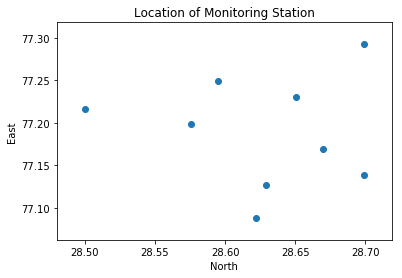

In [134]:
plt.scatter(arr_geo_1,arr_geo_2)
plt.title("Location of Monitoring Station")
plt.xlabel("North")
plt.ylabel("East")
plt.show()

In [175]:
geo_1 = 28.9
geo_2 = 77.9

In [129]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [ ]:
def Distance(x_train,x_test):
    return(((x_train-x_test)**2).sum())

In [145]:
geo = np.array(geo)

In [147]:
geo.shape

(2,)

In [150]:
locations = ['Nizamuddin, Delhi','Pritampura, Delhi','Shahzada Bagh, Delhi','Shahadra, Delhi',
             'Janakpuri, Delhi','Siri Fort, Delhi','N.Y. SCHOOL, Sarojini Nagar, Delhi',
             'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi','Mayapuri Industrial Area, Delhi']

In [154]:
locations = np.array(locations)

In [156]:
locations.shape

(9,)

In [ ]:
arr_geo_2 = [77.2491, 77.1384 ,77.1697 ,77.2926 ,77.0878 ,77.2166 ,77.1990 ,77.2303 ,77.1267]

In [336]:
reference ={[28.5948,77.2491] : 'Nizamuddin, Delhi'
             [28.6990 ,77.1384] :'Pritampura, Delhi'
             [28.6700,77.1697] :'Shahzada Bagh, Delhi'
             [28.6988 ,77.2926] :'Shahadra, Delhi'
             [28.6219 ,77.0878] : 'Janakpuri, Delhi'
             [28.5 ,77.2166] :'Siri Fort, Delhi'
             [28.5757,77.1990] :'N.Y. SCHOOL, Sarojini Nagar, Delhi',
             [28.6506,77.2303] :'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi'
             [28.6294,77.1267] :'Mayapuri Industrial Area, Delhi' }

SyntaxError: invalid syntax (<ipython-input-336-69be2ef80219>, line 2)

In [296]:
def Distance(x, geo_x,y, geo_y):
    distnace = math.sqrt(((x - geo_x)**2 + (y - geo_y)**2))
    return distance

In [303]:
def predictKNN(geo_x, geo_y):
    distances =[]
    for i in range(9):
        d = Distance(arr_geo_1[i],geo_x,arr_geo_2[i],geo_y)
        distances.append((d,i))
    distances.sort()
    return distances[0]

In [301]:
k = predictKNN(geo_1,geo_2)

In [334]:
k = np.array(k)
k

array([<function distance at 0x120d46f28>, 0], dtype=object)

In [ ]:
def KNN(geo_1,geo2):
    

In [ ]:
'''first apply knn on the coordinates
then make a purify feature by studying
''''